**vamos ha hacer una serie de predicciones del consumo con diferentes algortimos**

In [193]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**REGRESION LINEAL**

In [2]:
df = pd.read_csv("dataset/csv_limpio.csv")

In [3]:
X = df.drop(["consume"],axis=1)

In [4]:
y = df["consume"]

In [5]:
 X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.1, random_state = 42)

In [6]:
lr = LinearRegression()

In [7]:
model = lr.fit(X_train,y_train)

In [8]:
y_pred = model.predict(X_test)

In [84]:
print(mean_squared_error(y_pred,y_test)) #ERROR DE 0.54


0.5479636225308518


In [10]:
regresion_lineal = pd.DataFrame({"gas":X_test["gas_type"].apply(lambda x: "E10" if x == 0 else "SP98" ),"real":y_test,"prediccion": y_pred})
regresion_lineal.tail(10)

,gas,real,prediccion
299,SP98,4.2,4.172024
237,E10,4.8,4.958998
9,E10,5.3,5.200846
335,E10,3.8,4.688407
296,SP98,4.1,4.598128
55,SP98,4.9,5.297326
163,E10,4.4,5.072208
25,E10,4.1,4.702262
386,SP98,4.6,4.189407
82,SP98,3.6,5.030265


<Figure size 720x288 with 0 Axes>

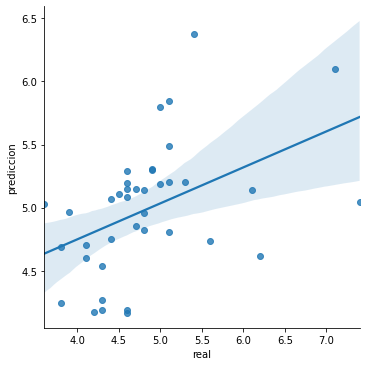

In [77]:
plt.figure(figsize=(10,4))
sns.lmplot(x="real", y="prediccion", data=regresion_lineal)
plt.show()

In [12]:
regresion_lineal.groupby("gas").mean()

,real,prediccion
gas,,
E10,4.905882,5.113629
SP98,4.772727,4.887425


In [13]:
gas10l = 5.11*1.38
gas10l#gasto en gas E10

7.0518

In [14]:
gas_sp98 = 4.88*1.46 
gas_sp98 #gasto en gas sp98

7.1248

In [196]:
#LA PREDICCIÓN HA SIDO QUE EL GAS E10 CONSUME 0.23 L MAS QUE EL SP98 DE MEDIA

**CON NORMALIZACION DE DATOS**

In [15]:
def norm_standard(valores):
    return (valores-np.mean(valores))/np.std(valores)

In [16]:
nor = norm_standard(df[["distance","speed","temp_inside","temp_outside"]])

In [17]:
nor["gas_type"] = df["gas_type"]

In [18]:
df.head(1)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0


In [19]:
nor["AC"] = df["AC"]

In [20]:
nor["rain"] = df["rain"]

In [21]:
nor["sun"]= df["sun"]

In [22]:
nor

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.368714,-1.172804,-0.432382,0.091908,0,0,0,0
1,-0.338044,-0.878274,-0.432382,0.235123,0,0,0,0
2,-0.373381,-0.289216,-0.432382,0.521552,0,0,0,0
3,-0.298288,-0.436480,-0.432382,0.378338,0,0,0,0
4,-0.050923,0.299843,-0.432382,0.521552,0,0,0,0
...,...,...,...,...,...,...,...,...
383,-0.161354,-0.215583,2.587600,0.951196,1,0,0,0
384,-0.156937,-0.289216,3.090931,2.812986,1,1,0,0
385,-0.161354,0.226211,3.090931,1.094411,1,0,0,0
386,-0.187858,0.005314,3.090931,2.812986,1,1,0,0


In [23]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split(nor,y ,test_size = 0.1, random_state = 42)

In [24]:
lr_nor = LinearRegression()

In [25]:
model_nor = lr_nor.fit(X_train2,y_train2)

In [26]:
y_pred_nor = model_nor.predict(X_test2)

In [27]:
mean_squared_error(y_pred_nor,y_test2)

0.5479636225308521

**CON NORMALIZACIÓN ME DIO EL MISMO ERROR CUADRÁTICO MEDIO, SEGUIRÉ PROBANDO MÁS MODELOS PARA MEJORAR LAS PREDICCIONES**

**DECISION TREE REGRESSOR**

In [66]:
arbol = DecisionTreeRegressor(max_depth = 4)

In [67]:
modelo_arbol = arbol.fit(X_train,y_train)

In [68]:
y_pred_arbol = modelo_arbol.predict(X_test)

In [69]:
print(modelo_arbol.score(X_train, y_train))

0.726547843532227


In [70]:
mean_squared_error(y_pred_arbol,y_test) #hemos mejorado nuestras predicciones con el arbol

0.41413028505937605

In [71]:
regresion_arbol = pd.DataFrame({"gas":X_test["gas_type"].apply(lambda x: "E10" if x == 0 else "SP98" ),"real":y_test,"prediccion": y_pred_arbol})
regresion_arbol.tail(10)


,gas,real,prediccion
299,SP98,4.2,4.136364
237,E10,4.8,4.888636
9,E10,5.3,4.888636
335,E10,3.8,4.136364
296,SP98,4.1,4.136364
55,SP98,4.9,5.271429
163,E10,4.4,4.888636
25,E10,4.1,4.888636
386,SP98,4.6,4.616279
82,SP98,3.6,4.888636


<Figure size 864x288 with 0 Axes>

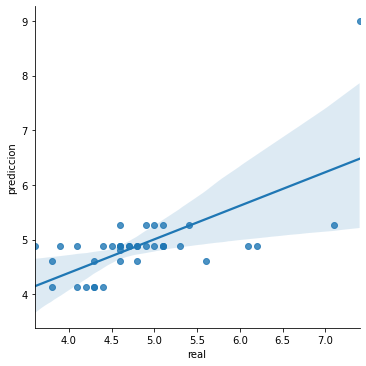

In [92]:
plt.figure(figsize=(12,4))
sns.lmplot(x="real", y="prediccion", data=regresion_arbol)
plt.show()

In [93]:
regresion_arbol.groupby("gas").mean() #sin embargo con el arbol nos ha predecido que E10 consume menos  que SP98, pero
#por una diferencia de 0.04l

,real,prediccion
gas,,
E10,4.905882,4.879895
SP98,4.772727,4.915576


**con normalizacion**

In [103]:
arbol_nor = DecisionTreeRegressor(max_depth = 4)

In [104]:
modelo_arbol_nor = arbol_nor.fit(X_train2,y_train2)

In [105]:
pred_arbol_norm = modelo_arbol.predict(X_test2)

In [106]:
mean_squared_error(pred_arbol_norm,y_test2) #con la normalización peores resultados, muy malos

38.96131461882274

**random forest regressor**

In [189]:
modeli = RandomForestRegressor()
modeli.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=4, n_estimators=10)

In [190]:
pred_random = modeli.predict(X_test)

# Plot actual vs predicted

In [197]:
mean_squared_error(pred_random,y_test) #con random forest obtuvimos una predicción mejor que con el arbol tree

0.2530459595797724

In [192]:
regresion_forest = pd.DataFrame({"gas":X_test["gas_type"].apply(lambda x: "E10" if x == 0 else "SP98" ),"real":y_test,"prediccion": pred_random})
regresion_forest.tail(10)


,gas,real,prediccion
299,SP98,4.2,4.4500
237,E10,4.8,5.2510
9,E10,5.3,4.8480
335,E10,3.8,4.2400
296,SP98,4.1,4.1050
55,SP98,4.9,5.2780
163,E10,4.4,5.0460
25,E10,4.1,4.5205
386,SP98,4.6,4.6870
82,SP98,3.6,4.4670


<Figure size 864x288 with 0 Axes>

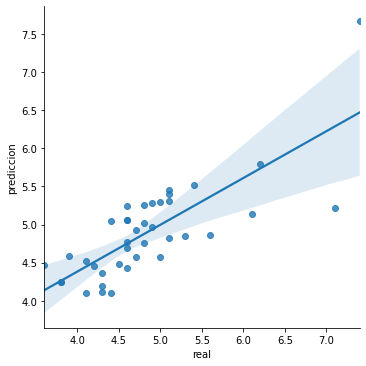

In [194]:
plt.figure(figsize=(12,4))
sns.lmplot(x="real", y="prediccion", data=regresion_forest)
plt.show()

In [195]:
regresion_forest.groupby("gas").mean() #nos predice que gasta más de media el sp98 que el E10

,real,prediccion
gas,,
E10,4.905882,4.847971
SP98,4.772727,4.928549


In [198]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


**EN CONCLUSION HE OBTENIDO BUENAS MÉTRICAS AUNQUE MEJORABLES, Y DONDE ME HA PREDECIDO EN GENERAL QUE EL E10 CONSUME MENOS QUE 
EL SP98, Y TENIENDO EN CUENTA QUE ENCIMA ES MÁS BARATO, ME QUEDARÍA CON EL E10**

In [201]:
#guardo mi modelo
import joblib

In [202]:
joblib.dump(modeli, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']